In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# df_ASD_0 = pd.read_excel('modified_data\\Agricultural structure data ASD_2010_2016.xlsx', sheet_name=0)
# df_ASD_0.rename(columns={'Name':'Landkreis'}, inplace=True)
# print(df_ASD_0.shape)
# 
df_All_Data = pd.read_excel('All_Data_Alltractors.xlsx', sheet_name=0)
print(df_All_Data.shape)

(1593, 65)


In [5]:
# df_tractors = pd.read_excel('modified_data\\Vehicle Registration Consolidated.xlsx', sheet_name=0)
# print(df_tractors.shape)
# df_tractors
# df_merge = pd.merge(df_Merge_ASDnVehiclenCompany, df_tractors, on="LandKreis ID", how='left')
# print(df_merge.shape)
# df_merge
# df_merge.to_excel('All_Data_AllTractors.xlsx')

In [6]:
# just checking that there's no missing data missing...
# df_Merge_ASDnVehiclenCompany.isnull().sum().max() 
print("NAs for numerical features in train : " + str(df_All_Data.isnull().values.sum()))
df_All_Data = df_All_Data.fillna(0)
print("Remaining NAs for numerical features in train : " + str(df_All_Data.isnull().values.sum()))

NAs for numerical features in train : 0
Remaining NAs for numerical features in train : 0


In [7]:
# # !! should transfer categorical data into numerical data
# # 1. if two features are related to each other, pick up the one which has higher value of correlation (twin brother effect)
# # 2. if 'year' is relevant to dependent variable, then we need to take time series analysis into account
# corrmat = df_Merge_ASDnCompany.corr()
# colormap = plt.cm.RdBu
# plt.figure(figsize=(14, 12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(corrmat, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [9]:
df_All_Data['LandKreis_ID'].unique().shape

(321,)

In [10]:
year = 201718
company = 1234
# df = df_All_Data[(df_All_Data['Year'] == year) &
#                  (df_All_Data['Company'] == company)]
df = df_All_Data

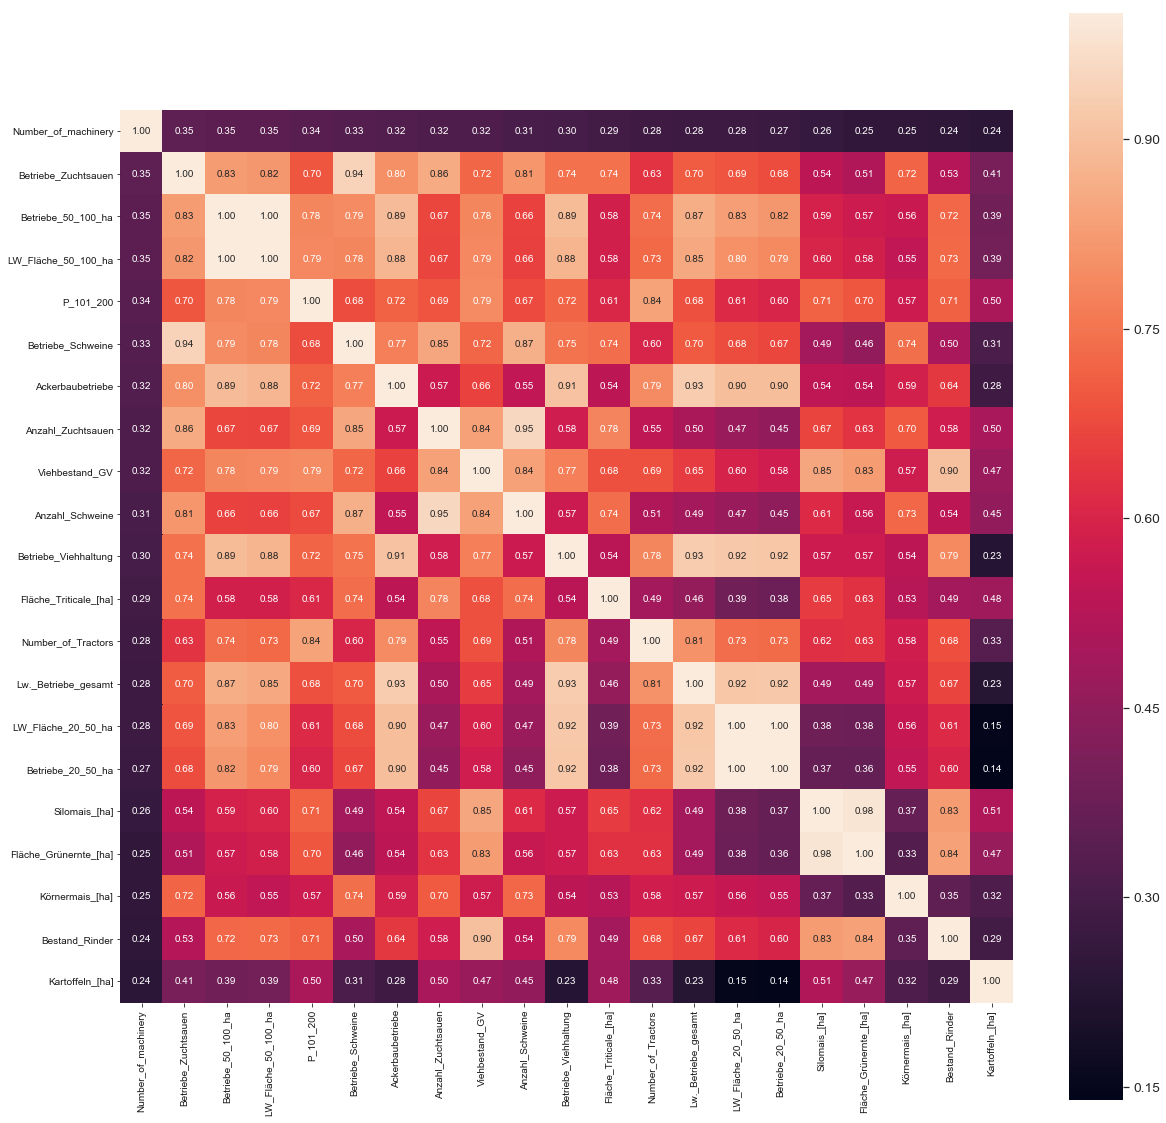

Index(['Number_of_machinery', 'Betriebe_Zuchtsauen', 'Betriebe_50_100_ha',
       'LW_Fläche_50_100_ha', 'P_101_200', 'Betriebe_Schweine',
       'Ackerbaubetriebe', 'Anzahl_Zuchtsauen', 'Viehbestand_GV',
       'Anzahl_Schweine', 'Betriebe_Viehhaltung', 'Fläche_Triticale_[ha]',
       'Number_of_Tractors', 'Lw._Betriebe_gesamt', 'LW_Fläche_20_50_ha',
       'Betriebe_20_50_ha', 'Silomais_[ha]', 'Fläche_Grünernte_[ha]',
       'Körnermais_[ha]', 'Bestand_Rinder', 'Kartoffeln_[ha]'],
      dtype='object')


In [11]:
# number of machinery sales correlation matrix
figsize = (20, 20)
fig, ax = plt.subplots(figsize=figsize, nrows=1, ncols=1)
corrmat = df.corr()
k = 21 # number of variables for heatmap
cols = corrmat.nlargest(k, 'Number_of_machinery')['Number_of_machinery'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
cm = np.corrcoef(df[cols].values.T)
figure = hm.get_figure()    
figure.savefig(str(year) + "_C" + str(company) + "_Alltractors.png")
print(cols)

In [12]:
# scatterplot
sns.set()
cols = ['Number_of_machinery', 'Betriebe_Zuchtsauen', 'Ackerbaubetriebe',
       'Betriebe_50_100 ha', 'Betriebe_Schweine']
sns.pairplot(df[cols])
plt.show()

KeyError: "['Betriebe_50_100 ha'] not in index"

In [ ]:
# scatterplot
sns.set()
cols = ['Number of machinery', 'Betriebe bis 5 ha', 'Betriebe 5-20 ha', 'Betriebe 20-50 ha',
       'Betriebe 50-100 ha', 'Betriebe 100-200 ha', 'Betriebe über 200 ha']
sns.pairplot(df[cols])
plt.show()

In [ ]:
# scatterplot
sns.set()
cols = ['Number of machinery', 'Betriebe Zuchtsauen', 'Betriebe Schweine', 'Betriebe Viehhaltung', 'Bestand Rinder', 'Milchkuhhalter',
       'Betriebe Schafe']
sns.pairplot(df[cols])
plt.show()

In [ ]:
# scatterplot
sns.set()
# 'Anzahl Kälber', 'Anzahl Ferkel', These are missing data
cols = ['Number of machinery', 'Viehbestand GV', 'Anzahl Zuchtsauen',
        'Anzahl Schweine', 'Bestand Rinder','Milchkühe', 'Anzahl Schafe']
sns.pairplot(df[cols])
plt.show()

### According to our crystal ball, there are the variables most correlated with sum of total. My thoughts on this
####

In [ ]:
#histogram
sns.distplot(df['Number of machinery']);